# PROJETO FINAL
INTRODUÇÂO AO PROCESSAMENTO DE IMAGENS


Prof. Bruno Luiggi Macchiavello Espinoza


- Lucas Corrêa Boaventura - 211038262

- Gustavo - 

## Bibliotecas

In [4492]:
import numpy as np
from PIL import Image
from IPython.display import display
import cv2
import matplotlib.pyplot as plt

In [4493]:
img = Image.open("tatiana.png")
print(img.mode)
gray_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGBA2GRAY)

RGBA


## Thresholding

### Global

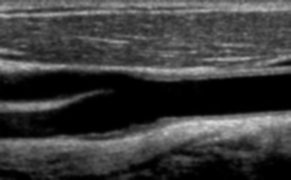

In [4494]:
img_low_filter = cv2.GaussianBlur(gray_img, (5, 5), 0)
Image.fromarray(img_low_filter)

In [4495]:
# histograma = cv2.calcHist([img_low_filter], [0], None, [256], [0, 256])
# plt.figure(figsize=(5, 3))
# plt.plot(histograma, color='black')
# plt.title('Imagem original')
# plt.xlabel('Intensidade de Cinza')
# plt.ylabel('Número de Pixels')
# plt.grid()
# plt.show()

(180, 291)
Método OTSU


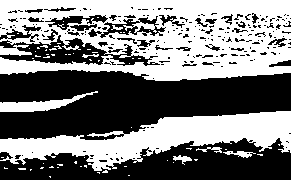

In [4496]:
_, img_bin = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# _, img_bin_dps_filtro = cv2.threshold(img_low_filter, 0, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

print(img_bin.shape)
print("Método OTSU")
display(Image.fromarray(img_bin))
# print("Método OTSU após um filtro Gaussiano")
# Image.fromarray(img_bin_dps_filtro)

achei inutil


In [4497]:
# def elem_stru(shape) : return np.ones(shape, np.uint8)

# img_open = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, elem_stru(3))
# display(Image.fromarray(img_open))
# img_open_closed = cv2.morphologyEx(img_open, cv2.MORPH_CLOSE, elem_stru(5))
# Image.fromarray(img_open_closed)

In [4498]:
# num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_bin, connectivity=8)

# conection = np.zeros((img_bin.shape[0], img_bin.shape[1]), dtype=np.uint8)
# random_color = np.random.randint(0, 255)
# conec1=conection.copy()
# conec2=conection.copy()
# print(stats)
# conec1[labels == 1] = 255
# conec2[labels == 0] = 255
# display(Image.fromarray(conec1))
# display(Image.fromarray(conec2))
# Image.fromarray(conec2 - conec1)

In [4499]:
# def use_kmeans(image, clusters, iter=36, precision=4):
#     img = np.float32(np.array(image).reshape((-1, 1)))
#     print(img.shape)
#     criterios = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, iter, precision)

#     _, labels, centers = cv2.kmeans(img, clusters, None, criterios, 10, cv2.KMEANS_RANDOM_CENTERS)
#     centers = np.uint8(centers)

#     display(Image.fromarray(centers[labels.flatten()].reshape(np.array(image).shape)))
#     return labels, centers

# labels, centers=use_kmeans(img_bin, 20)

# output_image = np.zeros_like(img_bin).reshape((-1, 1))
# output_image[labels.flatten()==np.argmin(centers)] = 255

# img_seg = output_image.reshape(np.array(img_bin).shape)

# # print(img_seg)
# display(Image.fromarray(img_seg))


# Image.fromarray(centers[labels.flatten()].reshape(np.array(img_bin).shape))

### Local

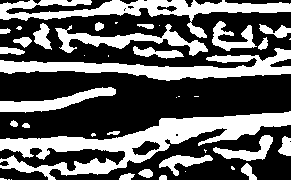

In [4500]:
blurred = cv2.GaussianBlur(gray_img, (15, 15), 0)

thresh_mean = cv2.adaptiveThreshold(
    blurred, 
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY , 
    19,  # Tamanho do bloco (área local)
    0    # Constante subtraída da média
)

# Aplicar Threshold Adaptativo - Método Gaussiano
thresh_gaussian = cv2.adaptiveThreshold(
    blurred, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    19,  # Tamanho do bloco (área local)
    0    # Constante subtraída da média ponderada
)

Image.fromarray(thresh_mean)


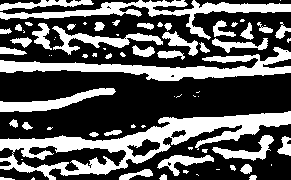

In [4501]:
Image.fromarray(thresh_gaussian)

## Watershed

In [4502]:
img = Image.open("tatiana.png")
print(img.mode)
gray_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGBA2GRAY)

RGBA


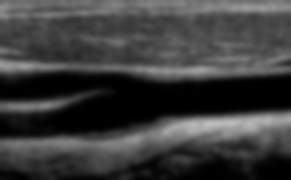

In [4503]:
img_low_filter = cv2.GaussianBlur(gray_img, (15, 15), 0)
Image.fromarray(img_low_filter)

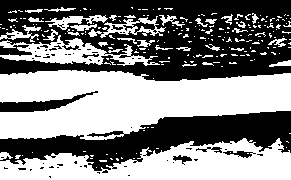

In [4504]:
ret, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
Image.fromarray(thresh)

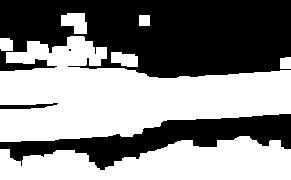

In [4505]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 5. Identificar a área de fundo seguro (dilatação)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
Image.fromarray(sure_bg)

In [4506]:
ret, markers = cv2.connectedComponents(gray_img)
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)

In [4507]:
# image=gray_img.copy()

# markers = cv2.watershed(image, markers)
# image[markers == -1] = [255, 0, 0]

In [4508]:
# Read the image
img_original = cv2.imread('tatiana.png')
gray = cv2.cvtColor(img_original, cv2.COLOR_RGBA2GRAY)
blurred = cv2.GaussianBlur(gray_img, (15, 15), 0)
# Apply thresholding


In [4509]:
ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove noise
# kernel = np.ones((5, 5), np.uint8)
# opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)


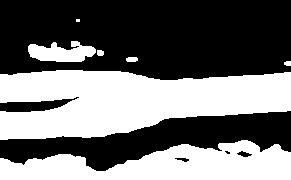

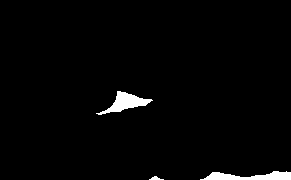

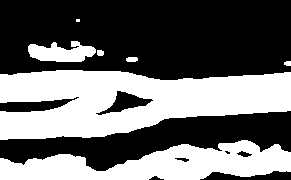

In [4510]:
# Fundo
sure_bg = cv2.dilate(thresh, kernel, iterations=1)
display(Image.fromarray(sure_bg))

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 0)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
display(Image.fromarray(sure_fg))


unknown = cv2.subtract(sure_bg, sure_fg)
Image.fromarray(unknown)

In [4511]:
_, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(img_original, markers)


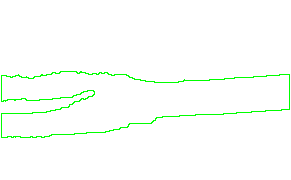

In [4512]:
water_fill = np.zeros(np.array(img).shape, dtype=np.uint8)
water_fill[markers == 2] = [0,255,0,255] #selecionado manualmente a label que preencheu a area requerida

kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(water_fill, np.ones((3, 3), np.uint8))
contour = water_fill-erosion
Image.fromarray(contour)


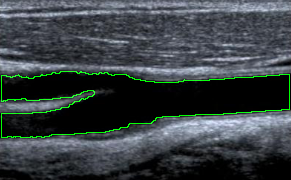

In [4513]:
tumor_highlighted = cv2.addWeighted(np.array(img), 1, contour,1, 0)
Image.fromarray(tumor_highlighted)